In [32]:
import numpy as np
import gdal
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import geopandas as gpd
import shapefile

# reading the indices csv file

In [34]:
non_agri = pd.read_csv("E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\non_agri.csv")
non_agri.drop(non_agri.columns[0], axis = 1, inplace = True)
non_agri

,0,1
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
40562562,8962,8293
40562563,8962,8294
40562564,8962,8295
40562565,8962,8296


In [35]:
agri = pd.read_csv("E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\agri.csv")
agri.drop(agri.columns[0], axis = 1, inplace = True)
agri

,0,1
0,0,5738
1,0,5739
2,0,5740
3,0,5741
4,0,5742
...,...,...
33812402,8962,5787
33812403,8962,5788
33812404,8962,5789
33812405,8962,5790


In [36]:
image = gdal.Open("E:\\Internship_Harvesting\\Dataset\\10_2019.tif")

In [37]:
image.RasterYSize, image.RasterXSize, image.RasterCount

(8963, 8298, 5)

In [38]:
image_zero = np.zeros((image.RasterYSize, image.RasterXSize, image.RasterCount))

In [39]:
image_zero.shape

(8963, 8298, 5)

In [41]:
for b in range(image_zero.shape[2]):
    image_zero[:, :, b] = image.GetRasterBand(b + 1).ReadAsArray()

In [42]:
image_1_band_1 = image_zero[:,:,0]

In [43]:
image_1_band_1.shape

(8963, 8298)

In [44]:
import skimage.io as skio

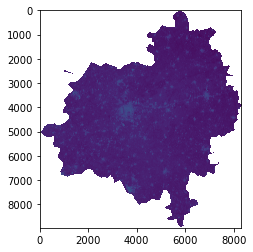

In [45]:
plt.imshow(image_1_band_1)
plt.show()

In [48]:
agri.columns = ["x_index", "y_index"]
agri

,x_index,y_index
0,0,5738
1,0,5739
2,0,5740
3,0,5741
4,0,5742
...,...,...
33812402,8962,5787
33812403,8962,5788
33812404,8962,5789
33812405,8962,5790


In [49]:
image_1_band_1_agri = []

In [50]:
image_1_band_1[agri.iloc[0,0], agri.iloc[0,1]]

1249.0

In [51]:
image_1_band_1[0, 5738]

1249.0

In [52]:
I1B1_zero = np.zeros((8963, 8298))

In [53]:
I1B1_zero[agri.iloc[0,0], agri.iloc[0,1]]

0.0

In [54]:
image_1_band_1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [55]:
len(agri["x_index"].values)

33812407

In [56]:
for i in range(len(agri["x_index"].values)):
    I1B1_zero[agri.iloc[i,0], agri.iloc[i,1]] = image_1_band_1[agri.iloc[i,0], agri.iloc[i,1]]

KeyboardInterrupt: 